### => IMPORT PANDAS, NUMPY & MATPLOTLIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### => LOAD FASHION_MNIST DATA FROM TENSORFLOW

In [2]:
from tensorflow.keras.datasets import fashion_mnist

### => SPLITTING THE ORIGINAL DATA INTO TRAINING DATA & TESTING DATA

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
print(y_train[:10])
print(list(set(y_train)))

[9 0 0 3 0 2 7 2 5 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<br>0. T-shirt/top </br>
<br>1. Trouser </br>
<br>2. Pullover </br>
<br>3. Dress </br>
<br>4. Coat </br>
<br>5. Sandal </br>
<br>6. Shirt </br>
<br>7. Sneaker </br>
<br>8. Bag </br>
<br>9. Ankle boot </br>

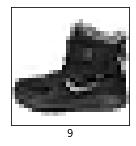

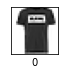

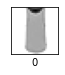

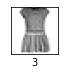

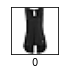

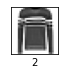

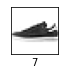

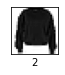

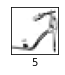

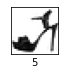

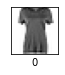

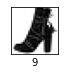

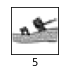

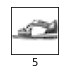

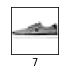

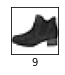

In [5]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    plt.show()

### => PREPROCESSING STEP FOR REDUCING THE TRAINING & TEST DATA

In [6]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [7]:
print(x_train[46])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0   0   0   1   1   

### => NORMALIZING

In [8]:
x_train = x_train/255
x_test = x_test/255

### => RESHAPING

In [9]:
x_train = x_train.reshape(5000,28,28,1)
x_test = x_test.reshape(1000,28,28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


### => IMPORT SEQUENTIAL,DENSE,FLATTEN,CONV2D,MAXPOOLING2D,ADAM

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

### => BUILT CNN ARCHITECTURE

In [11]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(128,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### => EXECUTING FOR APPROPRIATE NUMBER OF EPOCHS

In [12]:
h1 = m1.fit(x_train,y_train,epochs=6,validation_data=(x_test,y_test))

Epoch 1/6
157/157 [==============================] - 6s 32ms/step - loss: 0.9189 - accuracy: 0.6768 - val_loss: 0.6543 - val_accuracy: 0.7660
Epoch 2/6
157/157 [==============================] - 5s 30ms/step - loss: 0.5364 - accuracy: 0.7976 - val_loss: 0.5887 - val_accuracy: 0.7850
Epoch 3/6
157/157 [==============================] - 5s 31ms/step - loss: 0.4668 - accuracy: 0.8282 - val_loss: 0.4742 - val_accuracy: 0.8240
Epoch 4/6
157/157 [==============================] - 5s 31ms/step - loss: 0.4142 - accuracy: 0.8548 - val_loss: 0.4703 - val_accuracy: 0.8250
Epoch 5/6
157/157 [==============================] - 5s 31ms/step - loss: 0.3766 - accuracy: 0.8690 - val_loss: 0.4489 - val_accuracy: 0.8410
Epoch 6/6
157/157 [==============================] - 5s 31ms/step - loss: 0.3468 - accuracy: 0.8724 - val_loss: 0.4559 - val_accuracy: 0.8350


In [13]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
1,0.536358,0.7976,0.588736,0.785,1
2,0.466763,0.8282,0.474172,0.824,2
3,0.414196,0.8548,0.470317,0.825,3
4,0.376577,0.8690,0.448934,0.841,4
5,0.346769,0.8724,0.455893,0.835,5


### => PLOT THE GRAPH BETWEEN LOSS & VAL_LOSS

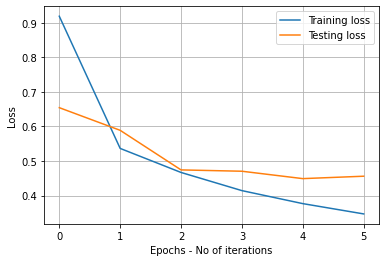

In [14]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs - No of iterations')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### => PLOT THE GRAPH BETWEEN ACCURACY & VAL_ACCURACY

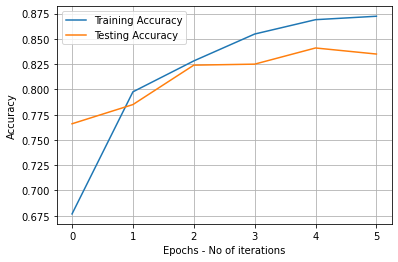

In [15]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training Accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing Accuracy')
plt.xlabel('Epochs - No of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### => PREDICTION ON TEST_DATA

In [16]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[[4.7189519e-06 2.0176942e-06 1.0399754e-05 ... 1.3939661e-02
  1.2858189e-03 9.8235691e-01]
 [2.9835256e-03 3.7141902e-07 9.5658284e-01 ... 4.2947317e-09
  2.8004490e-05 3.3681857e-08]
 [4.1931497e-05 9.9995244e-01 2.6974723e-08 ... 1.0754426e-09
  4.0345840e-06 7.7858076e-13]
 ...
 [3.6685693e-03 2.0898641e-04 4.6055770e-01 ... 9.9147146e-06
  8.0304025e-03 9.9262441e-05]
 [2.2076988e-03 3.4629033e-04 4.8976828e-04 ... 8.8070697e-01
  8.3948085e-03 3.3109181e-03]
 [2.1407959e-06 7.8001955e-07 2.5036366e-06 ... 9.9987400e-01
  2.3114690e-05 1.9125140e-05]]


In [17]:
print(sum(ypred_m1[0]))
print(sum(ypred_m1[330]))
print(sum(ypred_m1[893]))

1.000000016164563
1.0000000334612196
0.9999999645351636


In [18]:
ypred_m2 = [np.argmax(i) for i in ypred_m1]
print(ypred_m2)

[9, 2, 1, 1, 6, 1, 6, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5, 1, 2, 4, 0, 9, 4, 8, 8, 3, 0, 8, 0, 7, 5, 7, 9, 0, 1, 0, 9, 4, 7, 2, 1, 4, 6, 2, 2, 5, 6, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 4, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 2, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8, 0, 0, 9, 9, 3, 0, 8, 2, 1, 5, 4, 1, 9, 1, 8, 2, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4, 1, 4, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 0, 7, 9, 9, 4, 4, 7, 1, 2, 1, 2, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 2, 7, 2, 8, 5, 2, 0, 7, 7, 0, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 2, 6, 2, 9, 7, 6, 5, 5, 2, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 6, 8, 9, 0, 1, 0, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 2, 3, 0, 4, 0, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 3, 3, 3, 2, 8, 0, 0, 2, 9, 7, 7, 1, 6, 2, 6, 2, 4, 7, 1, 6, 2, 8, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 7, 6, 

### => CONFUSION MATRIX & CLASSIFICATION REPORT

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
cm_m1 = confusion_matrix(y_test,ypred_m2)
print(cm_m1)
print(classification_report(y_test,ypred_m2))

[[100   0   3   1   0   0   2   0   1   0]
 [  1 101   0   2   0   0   1   0   0   0]
 [  3   0  96   1   7   0   4   0   0   0]
 [ 13   0   1  69   3   0   6   0   1   0]
 [  1   0  21   0  86   0   7   0   0   0]
 [  0   0   0   0   0  80   0   5   0   2]
 [ 22   0  27   3  11   0  34   0   0   0]
 [  0   0   0   0   0   3   0  88   0   4]
 [  2   0   0   1   1   0   1   0  90   0]
 [  0   0   0   0   0   1   0   3   0  91]]
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       107
           1       1.00      0.96      0.98       105
           2       0.65      0.86      0.74       111
           3       0.90      0.74      0.81        93
           4       0.80      0.75      0.77       115
           5       0.95      0.92      0.94        87
           6       0.62      0.35      0.45        97
           7       0.92      0.93      0.92        95
           8       0.98      0.95      0.96        95
           9       0.94     